<a href="https://colab.research.google.com/github/fgith/data-science/blob/main/kaggle/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
! wget "https://raw.githubusercontent.com/fgith/data-science/main/datasets/healthcare-dataset-stroke-data.csv"

--2022-05-17 16:52:58--  https://raw.githubusercontent.com/fgith/data-science/main/datasets/healthcare-dataset-stroke-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316971 (310K) [text/plain]
Saving to: ‘healthcare-dataset-stroke-data.csv’

healthcare-dataset- 100%[===================>] 309.54K  --.-KB/s    in 0.03s   

2022-05-17 16:52:58 (9.80 MB/s) - ‘healthcare-dataset-stroke-data.csv’ saved [316971/316971]



# **1. Load Data**

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **2. Explore Data**

In [4]:
print('----------Dataset Shape----------')
print('No of Rows: ', df.shape[0],'| No of Columns: ',df.shape[1])
print('Columns:', df.columns.tolist())
print('---------------------------------')
print('----Column-wise unique values----')
cols = ['gender','hypertension','ever_married','work_type','Residence_type','smoking_status','stroke','heart_disease']
for i in range(len(cols)):
  print(cols[i],": ",df[cols[i]].unique().tolist())
print('---------------------------------')
print('-----Column-wise Nulls Dtype-----')
print(df.info())
print('---------------------------------')
print("No of Null values in column \'bmi':",df.bmi.isna().sum())

----------Dataset Shape----------
No of Rows:  5110 | No of Columns:  12
Columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
---------------------------------
----Column-wise unique values----
gender :  ['Male', 'Female', 'Other']
hypertension :  [0, 1]
ever_married :  ['Yes', 'No']
work_type :  ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Residence_type :  ['Urban', 'Rural']
smoking_status :  ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
stroke :  [1, 0]
heart_disease :  [1, 0]
---------------------------------
-----Column-wise Nulls Dtype-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   objec

**Observations:**
* Column 'bmi' has 201 Null values. These need to be made numerical later in the code
* Columns 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status' have Dtyle Dtype or String. These need to be made numerical later in the code

**Let's do the following:**
*   Drop un-needed column 'id'

In [5]:
df.drop('id', axis=1, inplace = True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41b6cb9690>]],
      dtype=object)

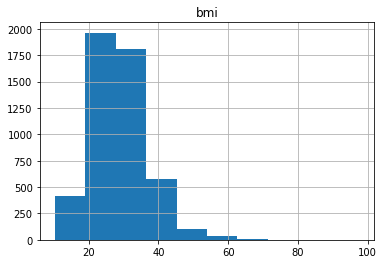

In [33]:
df.hist('bmi')

**4. Data Preprocessing**

In [29]:
df.fillna(0)
X = df.drop(['stroke','gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
y = df['stroke'].to_frame()

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state=0)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=20)
rf_clf.fit(X_train, y_train)
rf_clf.predict(X_test)

ValueError: ignored